In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

In [29]:
data = pd.read_excel("spam.xlsx")
data = data[['class', 'Message']]
data.head()

,class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
class      5572 non-null object
Message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [31]:
data.describe()

,class,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [32]:
df = data.groupby('class').count()

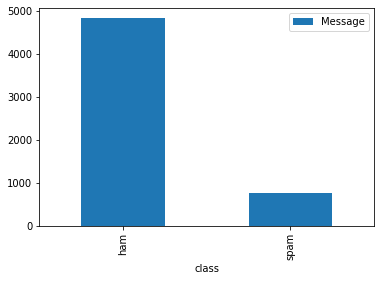

In [33]:
df.plot(kind='bar')

In [34]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [35]:
data['Message']= data.Message.str.lower()

In [36]:
data.dropna(inplace=True)

In [37]:
features = tfidf.fit_transform(data.Message).toarray()

In [38]:
features.shape

(5571, 2243)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['class'], random_state = 0)

In [41]:
count_vect = CountVectorizer()

In [42]:
X_train_counts = count_vect.fit_transform(X_train)

In [43]:
X_train_counts

<4178x7426 sparse matrix of type '<class 'numpy.int64'>'
	with 55330 stored elements in Compressed Sparse Row format>

In [44]:
tfidf_transformer = TfidfTransformer()

In [45]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [46]:
clf = MultinomialNB()

In [47]:
clf.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [48]:
x = clf.predict(count_vect.transform(X_test))

In [49]:
len(x)

1393

In [50]:
sum(x == y_test)

1356

In [51]:
sum('ham' == y_test)

1208

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [53]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [56]:
def model_score(model, X_trn, y_trn):
    accuracies = cross_val_score(model, X_trn, y_trn, scoring='accuracy', cv=5)
    return np.mean(accuracies)

In [60]:
print('model_name \t \tCV score')
for model in models:
    score=model_score(model,X_train_tfidf, y_train)
    print(model.__class__.__name__, '\t \t', score)

model_name 	 	CV score
RandomForestClassifier 	 	 0.8654862705177356
LinearSVC 	 	 0.9772583909028507
MultinomialNB 	 	 0.9516516910443489
LogisticRegression 	 	 0.9540446112970334


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
final_model = 